## 章節 4：更多的估計

### 4.5 Beta 分佈

還有一個優化方式能夠更快。

目前我們用 Pmf 物件代表一組離散的假設 x。我們現在要用連續型的分佈，Beta 分佈。(參考http://en.wikipedia.org/wiki/Beta_distribution).

Beta 分佈定義的數值範圍在 0 跟 1 之間（包含兩端）。所以它常常選擇用來描述比例或是機率。但等等，它還有更厲害的。

事實證明如果你用貝葉斯更新二項次分佈（Binomial Distribution）的似然性函數，也就是之前硬幣問題的例子，Beta 分佈是其共軛先驗分佈(Conjugate Prior)。這表示**如果先驗分佈服從 Beta 分佈則後驗分佈亦服從 Beta 分佈**。但等等，它還有更了不起的。

Beta 分佈的形狀取決於兩個參數，希臘字母 α 和 β（alpha 和 beta）。如果先驗分佈是一個 Beta 分佈並且給定 α, β，並且看到 h 次正面以及 t 次反面，則後驗分佈服從一個 Beta 分佈並且其參數為 α+h, β+t。換句話說**做貝葉斯更新只需要兩個加法**。

這太好了，但只有在我們確定用 Beta 分佈作為先驗分佈是一個好選擇的情況下。幸運的是，對於現實中的先驗分佈，有一個 Beta 分佈可以很接近均勻分佈，當 α=1, β=1 時，是數值 0 到 1 的均勻分佈。

以上就是 Beta 分佈的好處。thinkbayes.py 提供一個 Beta 分佈的類別。

<pre>
class Beta(object):
    def __init__(self, alpha=1, beta=1): # 預設是用均勻分佈 
        self.alpha = alpha
        self.beta = beta

    # 貝葉斯更新
    def Update(self, data): # data 是由（正面次數, 反面次數）構成
        heads, tails = data
        self.alpha += heads
        self.beta += tails
        
    # 期望值如下簡單的計算
    def Mean(self):
        return float(self.alpha) / (self.alpha + self.beta)
        
</pre>

我們有另一個方式解決歐元問題。如下程式碼：

先驗分佈的 Beta 分佈圖


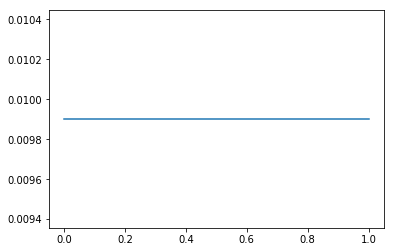

後驗分佈的 Beta 分佈圖


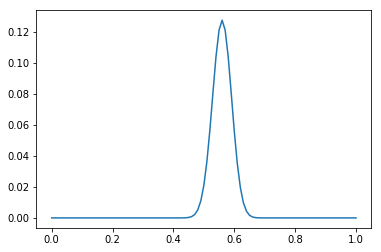

後驗分佈的期望值： 0.5595238095238095


In [36]:
from thinkbayes import Beta
import matplotlib.pyplot as plt

def plot_suite(suite):
    x, y = zip(*sorted(suite.Items()))
    plt.plot(x, y)
    plt.show()

heads, tails = 140, 110
beta = Beta()
print("先驗分佈的 Beta 分佈圖")
plot_suite(beta.MakePmf()) # 將 Beta 分佈轉換成離散的 Pmf 並且做圖
beta.Update((heads, tails))
print("後驗分佈的 Beta 分佈圖")
plot_suite(beta.MakePmf()) # 將 Beta 分佈轉換成離散的 Pmf 並且做圖

print("後驗分佈的期望值：", beta.Mean()) 

跟之前小節的歐元問題的期望值一樣都約為 56%。

Beta 類別也提供 EvalPdf 方法計算 Beta 分佈的機率密度函數（Probability Density Function）

<pre>
def EvalPdf(self, x):
    return x**(self.alpha-1) * (1-x)**(self.beta-1)
</pre>

用 Beta 類別的 MakePmf 方法，它會用 Evalpdf 產生離散近似的 Beta 分佈（如上程式碼作圖用法）。

Beta 分佈的離散機率密度圖（注意機率密度數值範圍為 3.5*1e-75）


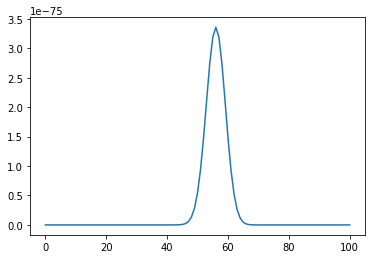

In [37]:
steps = 101
xs = [i / (steps - 1.0) for i in range(steps)]
probs = [beta.EvalPdf(x) for x in xs]
print("Beta 分佈的離散機率密度圖（注意機率密度數值範圍為 3.5*1e-75）")
plt.plot(range(steps), probs)
plt.show()